In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# Import datasets

red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
white_wine.Name = 'white wine'
red_wine.Name = 'red wine'

In [3]:
# Create new column 'quality_label' based on value of 'quality'.

red_wine['quality_label']= red_wine['quality'].apply(lambda val: 'low' if val <=5 else 'medium' if val <= 7 else 'high')
white_wine['quality_label'] = white_wine['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <= 7 else 'high')

# Now convert 'quality_label' into 'categorical' data type. 

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories = ['low', 'medium', 'high'])
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories = ['low', 'medium', 'high'])

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

wines = pd.concat([red_wine, white_wine])
wines = wines.sample(frac=1, random_state = 42).reset_index(drop = True)

red_wine.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

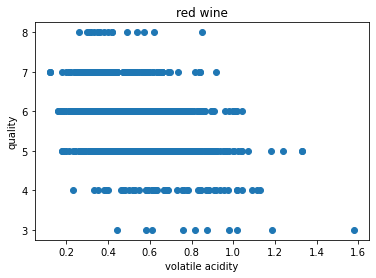

In [4]:
"""
Scatter plots

Try plotting 'volatile acidity' vs 'quality' for red wines
"""

fig, ax = plt.subplots()
ax.scatter(red_wine['volatile acidity'], red_wine['quality'])
ax.set_xlabel ('volatile acidity')
ax.set_ylabel('quality')
ax.set_title('red wine')
plt.show()

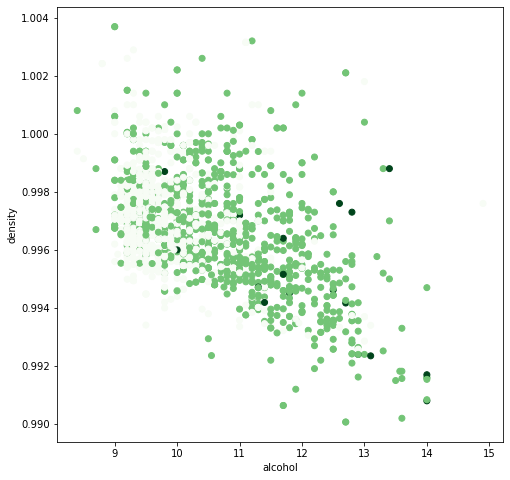

In [5]:
"""
Try a 3D scatter plot for red wine.

x axis: alcohol
y axis: density
colour: quality label
"""

color_dict = {'low': 1, 'medium': 2, 'high': 3}

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(red_wine['alcohol'], red_wine['density'], c = red_wine['quality_label'].apply(lambda x: 10 if x == 'low' else 20 if x == 'medium' else 30), cmap = 'Greens')
ax.set_xlabel ('alcohol')
ax.set_ylabel('density')
plt.show()

In [6]:
# Dataframe with all wines, divided into 'low', 'medium' and 'high'
wines_low = wines[wines['quality_label'] == 'low']
wines_medium = wines[wines['quality_label'] == 'medium']
wines_high = wines[wines['quality_label'] == 'high']

# Dataframe with white wines, divided into 'low', 'medium' and 'high'
white_wine_low = white_wine[white_wine['quality_label'] == 'low']
white_wine_medium = white_wine[white_wine['quality_label'] == 'medium']
white_wine_high = white_wine[white_wine['quality_label'] == 'high']

# Dataframe with red wines, divided into 'low', 'medium' and 'high'
red_wine_low = red_wine[red_wine['quality_label'] == 'low']
red_wine_medium = red_wine[red_wine['quality_label'] == 'medium']
red_wine_high = red_wine[red_wine['quality_label'] == 'high']

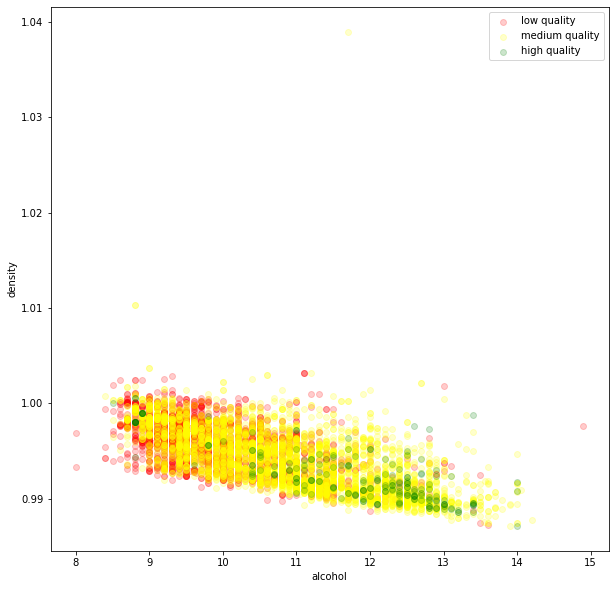

"\nOutliers take us out of where the main action is happening.\nLet's drop them in the following cell.\n"

In [7]:
"""
Another scatter plot for all wines
x axis: alcohol
y axis: density
colour: quality label
"""

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter (wines_low['alcohol'], wines_low['density'], color = 'red', alpha = 0.2, label = 'low quality')
ax.scatter (wines_medium['alcohol'], wines_medium['density'], color = 'yellow',alpha = 0.2, label = 'medium quality')
ax.scatter (wines_high['alcohol'], wines_high['density'], color = 'green',alpha = 0.2, label ='high quality')
ax.set_xlabel('alcohol')
ax.set_ylabel('density')
ax.legend()
plt.show()

"""
Outliers take us out of where the main action is happening.
Let's drop them in the following cell.
"""

In [8]:
"""
Visually, based on the scatter plot, 
we can tell that there are outliers roughly 
from y>1.01 onwards. So find the indices.
"""
print (np.where ((wines['density']>1.01)))


(array([2333, 3492, 5934]),)


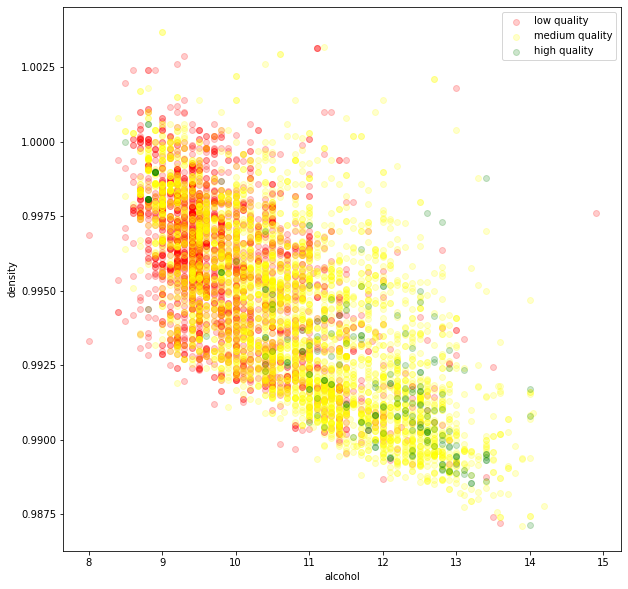

"\nIt's much easier to see the scatter plot now. \nBut it occurs to me now that a 3D scatter plot is not as useful. \n\nSo let's create some 2D ones first.\nWe'll keep in mind that removing outliers helps give a clearer picture.\n"

In [9]:
"""
Now drop the three rows and save dataframe to new variable
"""

wines_2 = wines.drop([2333,3492,5934], axis = 0)

"""
And create the same scatter plot as above.
"""
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter (wines_2[wines_2['quality_label'] == 'low']['alcohol'], 
            wines_2[wines_2['quality_label'] == 'low']['density'], 
            color = 'red', alpha = 0.2, label = 'low quality')

ax.scatter (wines_2[wines_2['quality_label'] == 'medium']['alcohol'], 
            wines_2[wines_2['quality_label'] == 'medium']['density'], 
            color = 'yellow', alpha = 0.2, label = 'medium quality')

ax.scatter (wines_2[wines_2['quality_label'] == 'high']['alcohol'], 
            wines_2[wines_2['quality_label'] == 'high']['density'], 
            color = 'green', alpha = 0.2, label = 'high quality')

ax.set_xlabel('alcohol')
ax.set_ylabel('density')
ax.legend()
plt.show()

"""
It's much easier to see the scatter plot now. 
But it occurs to me now that a 3D scatter plot is not as useful. 

So let's create some 2D ones first.
We'll keep in mind that removing outliers helps give a clearer picture.
"""

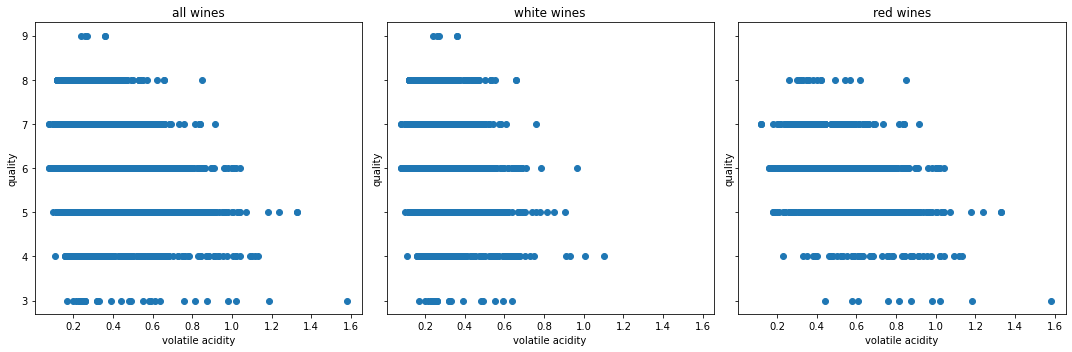

"\nIt's hard to see any clear trends from these plots.\nMaybe removing the outliers will help.\n\nRather than visually estimating the threshold \nfor the outliers, we will now use code.\n"

In [10]:
"""
Back to 2D scatter plots

On one figure, three subplots.
One for all wines, one for white wines, one for red wines

x axis: volatile acidity
y axis: quality
"""

fig, ax = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (15,5))
ax[0].scatter(wines['volatile acidity'], wines['quality'])
ax[0].set_xlabel ('volatile acidity')
ax[0].set_ylabel('quality')
ax[0].set_title('all wines')

ax[1].scatter(white_wine['volatile acidity'], white_wine['quality'])
ax[1].set_xlabel ('volatile acidity')
ax[1].set_ylabel('quality')
ax[1].set_title('white wines')

ax[2].scatter(red_wine['volatile acidity'], red_wine['quality'])
ax[2].set_xlabel ('volatile acidity')
ax[2].set_ylabel('quality')
ax[2].set_title('red wines')

plt.tight_layout()
plt.show()

"""
It's hard to see any clear trends from these plots.
Maybe removing the outliers will help.

Rather than visually estimating the threshold 
for the outliers, we will now use code.
"""

[  62   82  103  119  166  202  412  438  445  471  507  513  693  719
  724  849  862  869  873  908  924  994 1145 1240 1295 1377 1410 1498
 1518 1638 1745 2061 2110 2128 2133 2161 2183 2190 2215 2217 2225 2268
 2302 2393 2552 2739 2887 2942 3032 3044 3068 3120 3305 3311 3323 3337
 3380 3551 3708 3844 3998 4055 4079 4125 4185 4290 4471 4722 4838 4907
 5028 5053 5061 5162 5335 5336 5365 5519 5573 5617 5645 5839 5842 5849
 5934 6014 6031 6104 6167 6181 6238 6344 6429 6431 6441]
[  17   20   23  147  178  221  230  268  269  271  294  372  450  508
  687  821  926  948 1029 1034 1040 1152 1171 1180 1217 1245 1304 1369
 1401 1476 1496 1577 1708 1759 1856 1932 1951 2092 2154 2394 2408 2417
 2589 2629 2651 2668 2738 2741 2781 3022 3097 3165 3417 3528 3560 3564
 3571 3662 3710 3773 3879 3901 4039 4136 4316 4503 4597 4609 4619 4648
 4649 4650 4680 4686 4701 4702 4779 4789 4792 4815 4867]
[  38  120  126  127  199  672  690  724 1299 1312]


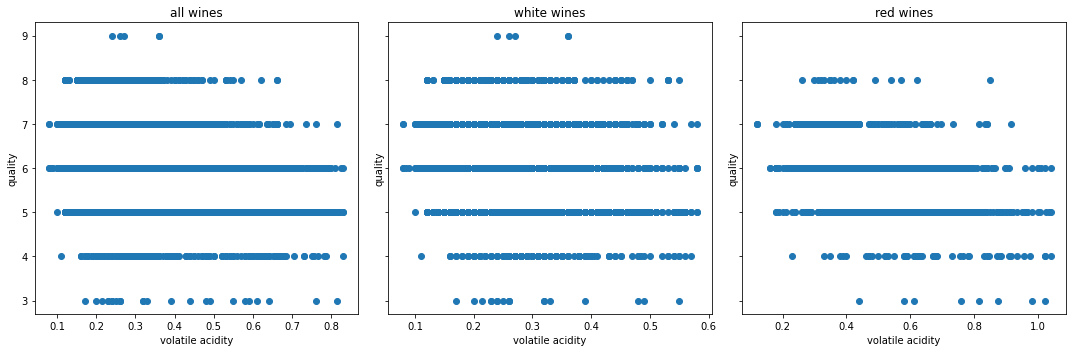

"\nOK, I'm realising now that ... it doesn't make sense to remove \nthe outliers from the dataframe with both wines, because\nthe volatile acidity range is so different between the white and red wines.\n\nIn fact, just create two plots, one for red, one for white, \nand ignore the combined data set for both wines.\n\nAlso, let's try switching the axes, putting\nquality on the x axis and volatile acidity on the y axis\n\n"

In [11]:
"""
Identifying and removing outliers.

Method 1: 'Z score'

We are dealing with the same parameters as above:

x axis: volatile acidity
y axis: quality
"""

z_all = np.abs(stats.zscore(wines['volatile acidity']))
z_white = np.abs(stats.zscore(white_wine['volatile acidity']))
z_red = np.abs(stats.zscore(red_wine['volatile acidity']))

"""
Each 'z' variable stores an array with all the 'z' values of the volatile acidity.

We will take z = 3 as the threshold, since 99.7% of the data should lie within
3 standard deviations of the mean.
"""

threshold = 3
print(np.where(z_all>3)[0])
print(np.where(z_white>3)[0])
print(np.where(z_red>3)[0])


"""
OK, so now let's drop all the relevant rows from each of the three dataframes.
"""

wines_no_outliers = wines.drop(np.where(z_all>3)[0])
white_wine_no_outliers = white_wine.drop(np.where(z_white>3)[0])
red_wine_no_outliers = red_wine.drop(np.where(z_red>3)[0])


fig, ax = plt.subplots(1, 3, sharey = True, figsize = (15,5))
ax[0].scatter(wines_no_outliers['volatile acidity'], wines_no_outliers['quality'])
ax[0].set_xlabel ('volatile acidity')
ax[0].set_ylabel('quality')
ax[0].set_title('all wines')

ax[1].scatter(white_wine_no_outliers['volatile acidity'], white_wine_no_outliers['quality'])
ax[1].set_xlabel ('volatile acidity')
ax[1].set_ylabel('quality')
ax[1].set_title('white wines')

ax[2].scatter(red_wine_no_outliers['volatile acidity'], red_wine_no_outliers['quality'])
ax[2].set_xlabel ('volatile acidity')
ax[2].set_ylabel('quality')
ax[2].set_title('red wines')

plt.tight_layout()
plt.show()


"""
OK, I'm realising now that ... it doesn't make sense to remove 
the outliers from the dataframe with both wines, because
the volatile acidity range is so different between the white and red wines.

In fact, just create two plots, one for red, one for white, 
and ignore the combined data set for both wines.

Also, let's try switching the axes, putting
quality on the x axis and volatile acidity on the y axis

"""





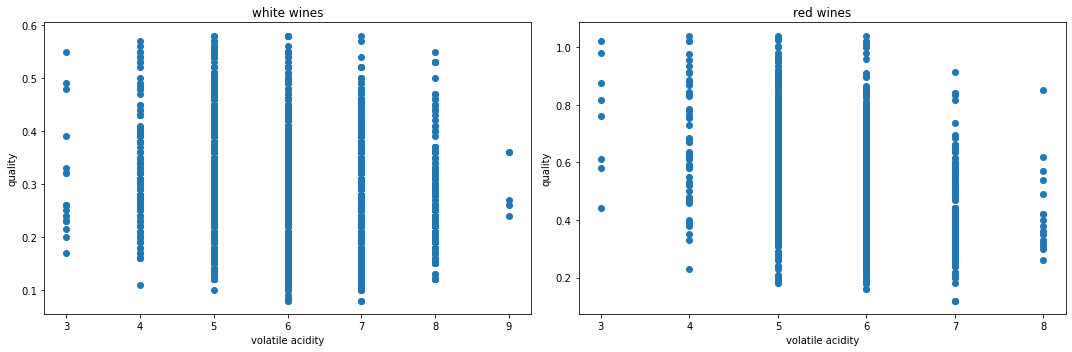

"\nOK, it's still hard to observe anything meaningful in these plots. \nBut create the same scatter plots for all the other variables too. \n\nWe'll begin by writing a function for creating 2D scatter plots.\n"

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

ax[0].scatter(white_wine_no_outliers['quality'], white_wine_no_outliers['volatile acidity'])
ax[0].set_xlabel ('volatile acidity')
ax[0].set_ylabel('quality')
ax[0].set_title('white wines')

ax[1].scatter(red_wine_no_outliers['quality'], red_wine_no_outliers['volatile acidity'])
ax[1].set_xlabel ('volatile acidity')
ax[1].set_ylabel('quality')
ax[1].set_title('red wines')

plt.tight_layout()
plt.show()

"""
OK, it's still hard to observe anything meaningful in these plots. 
But create the same scatter plots for all the other variables too. 

We'll begin by writing a function for creating 2D scatter plots.
"""

In [13]:
"""
Function for creating two 2D scatter plots 
on (1 x 2) subplots. One for white wines, one for red ones.

Two input parameters: feature 1, feature 2 (for x, y respectively)

This version doesn't remove outliers
"""

def create_2D_scatter(feature1, feature2):


    fig, ax = plt.subplots(1, 2, figsize = (10,5))

    ax[0].scatter(white_wine[feature1], white_wine[feature2])
    ax[0].set_xlabel (feature1)
    ax[0].set_ylabel(feature2)
    ax[0].set_title('white wines')

    ax[1].scatter(red_wine[feature1], red_wine[feature2])
    ax[1].set_xlabel (feature1)
    ax[1].set_ylabel(feature2)
    ax[1].set_title('red wines')

    plt.tight_layout()
    plt.show()


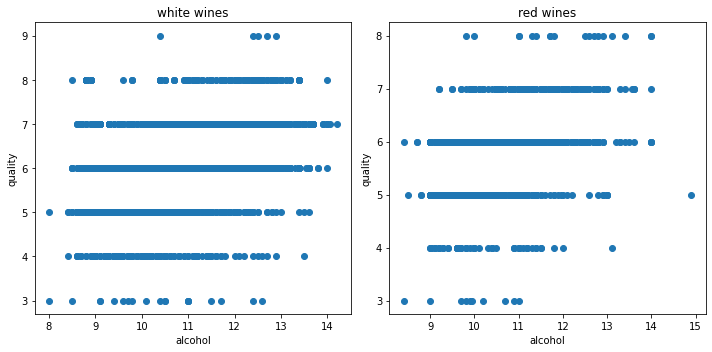

"\nIt's hard to take away much from this. \n\nLet's try fitting a linear graph using OLS.\n"

In [14]:
"""
Call the function on the features 'alcohol' and 'quality'
"""

create_2D_scatter('alcohol', 'quality')

"""
It's hard to take away much from this. 

Let's try fitting a linear graph using OLS.
"""

In [15]:
import statsmodels.api as sm

In [40]:
"""
Same function as create_2D_scatter, but with an OLS line.
Generalise, so you have four parameters:

df1, df2, feature1, feature2
"""

def create_2D_scatter_line(df1, df2, feature1, feature2):

    
    x_1 = df1[feature1].tolist()
    y_1 = df1[feature2].tolist()
    x_1 = sm.add_constant(x_1)
    result_1 = sm.OLS(y_1, x_1).fit()

    
    x_2 = df2[feature1].tolist()
    y_2 = df2[feature2].tolist()
    x_2 = sm.add_constant(x_2)
    result_2 = sm.OLS(y_2, x_2).fit()

    # Gradient and constant for white wine and red wine
    grad_1 = result_1.params[1]
    constant_1 = result_1.params[0]

    grad_2 = result_2.params[1]
    constant_2 = result_2.params[0]

    print (f"grad_1: {grad_1}, grad_2: {grad_2}, constant_1: {constant_1}, constant_2: {constant_2}")

    # Now we plot the scatter plots.

    fig, ax = plt.subplots(1, 2, figsize = (10,5))

    ax[0].scatter(df1[feature1], df1[feature2])
    ax[0].set_xlabel (feature1)
    ax[0].set_ylabel(feature2)
    ax[0].set_title(df1.Name)

    ax[1].scatter(df2[feature1], df2[feature2])
    ax[1].set_xlabel (feature1)
    ax[1].set_ylabel(feature2)
    ax[1].set_title(df2.Name)

    max_x_1 = df1[feature1].max()
    min_x_1 = df2[feature1].min()

    x_range_1 = np.arange(min_x_1, max_x_1, 0.1)
    y_1 = grad_1 * x_range_1 + constant_1

    max_x_2 = df2[feature1].max()
    min_x_2 = df2[feature1].min()

    x_range_2 = np.arange(min_x_2, max_x_2, 0.1)
    y_2 = grad_2 * x_range_2 + constant_2


    ax[0].plot(x_range_1, y_1, color = 'r')
    ax[1].plot(x_range_2, y_2, color = 'r')

    plt.tight_layout()
    plt.savefig(f'linear_reg_outliers_removed_{feature}.png')
    plt.show()

grad_1: -0.11928898863196293, grad_2: 0.057538643743882234, constant_1: 6.695610039009985, constant_2: 5.1573218689248055


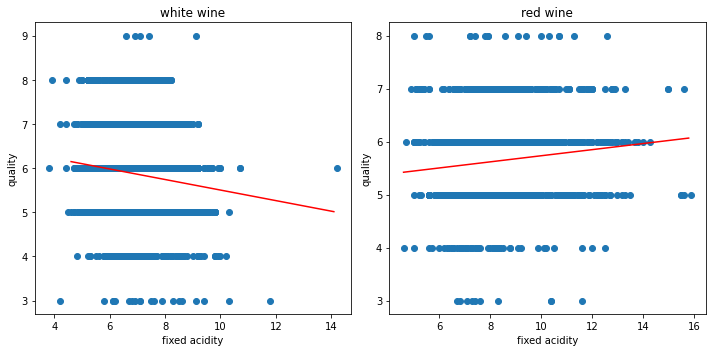

grad_1: -1.7109474213019527, grad_2: -1.7614377801126708, constant_1: 6.3539652755075196, constant_2: 6.565745506471794


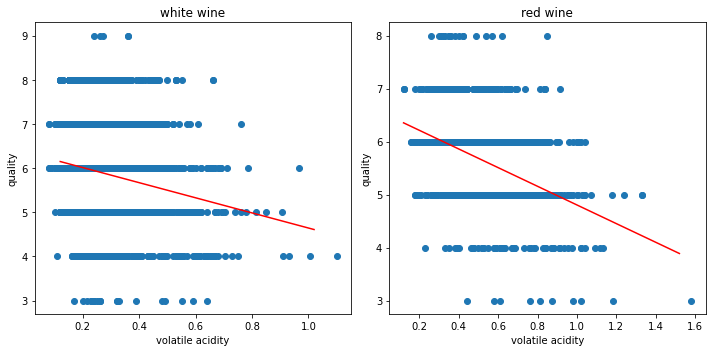

grad_1: -0.06739331782055948, grad_2: 0.9384520388029649, constant_1: 5.900431625181896, constant_2: 5.381724900629807


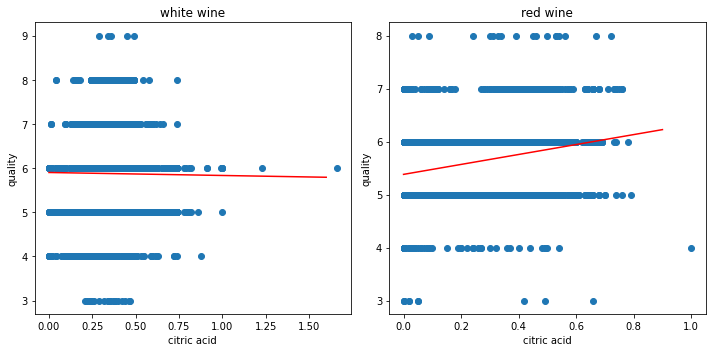

grad_1: -0.017038016397315354, grad_2: 0.00786511808072997, constant_1: 5.986806381996805, constant_2: 5.6160545090027245


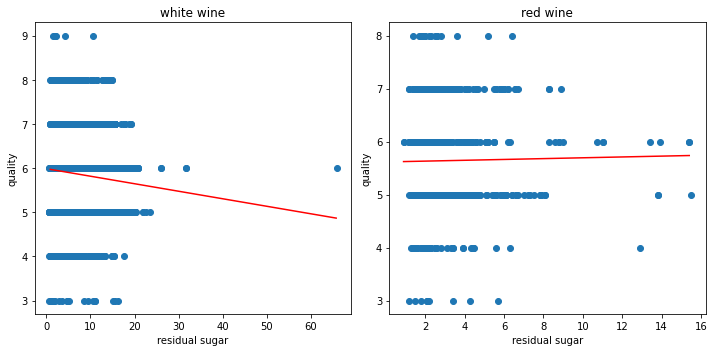

grad_1: -8.509991032116627, grad_2: -2.211841716399119, constant_1: 6.267431690376323, constant_2: 5.829484659545869


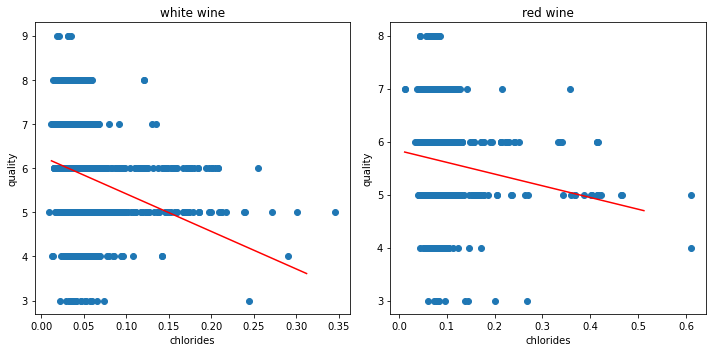

grad_1: 0.00042482745940874327, grad_2: -0.003910867101325621, constant_1: 5.862909506736907, constant_2: 5.698107223577285


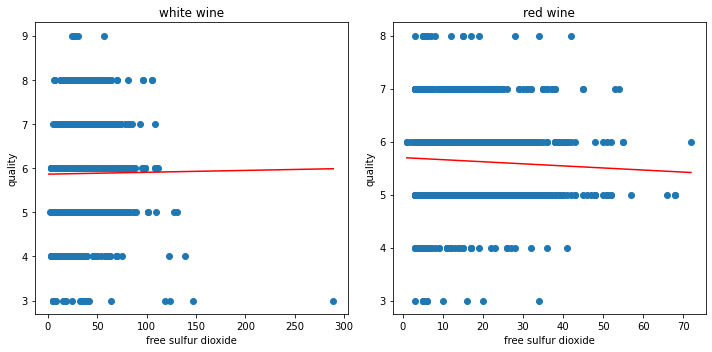

grad_1: -0.003641436898599207, grad_2: -0.00454415145598423, constant_1: 6.381740953966959, constant_2: 5.847179200426845


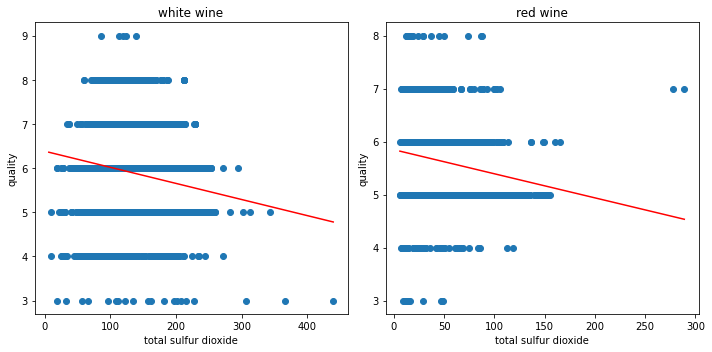

grad_1: -90.94239994213733, grad_2: -74.84601360147616, constant_1: 96.27714457605146, constant_2: 80.23853802079009


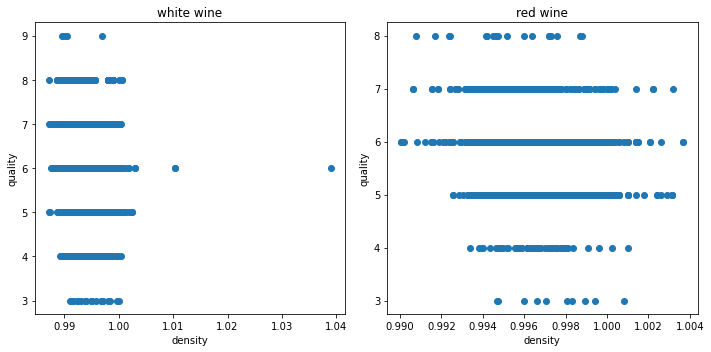

grad_1: 0.5831540037037609, grad_2: -0.30198312578737774, constant_1: 4.018658895088134, constant_2: 6.635922826758927


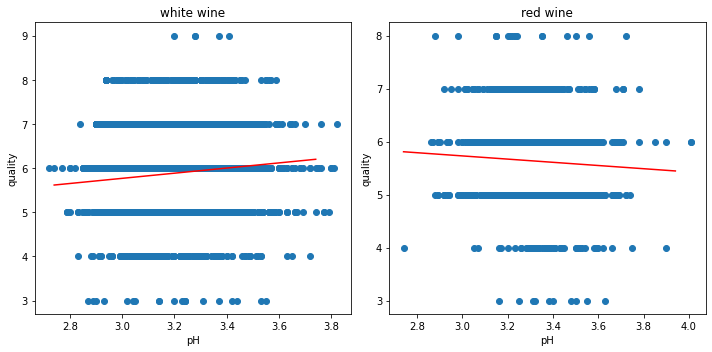

grad_1: 0.4165507227092698, grad_2: 1.197712323031371, constant_1: 5.673863280425765, constant_2: 4.847749534389136


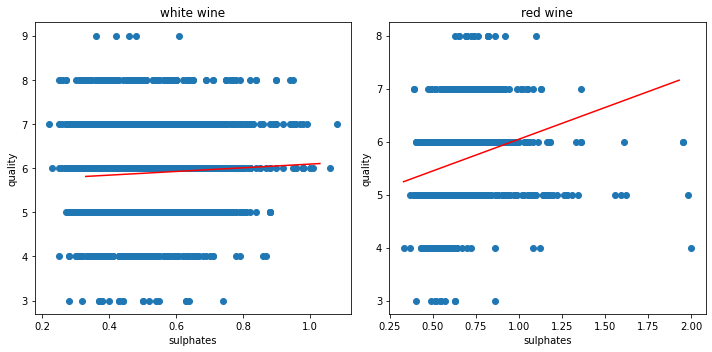

grad_1: 0.31346930191183553, grad_2: 0.3608417653350341, constant_1: 2.5820093991748836, constant_2: 1.8749748869971734


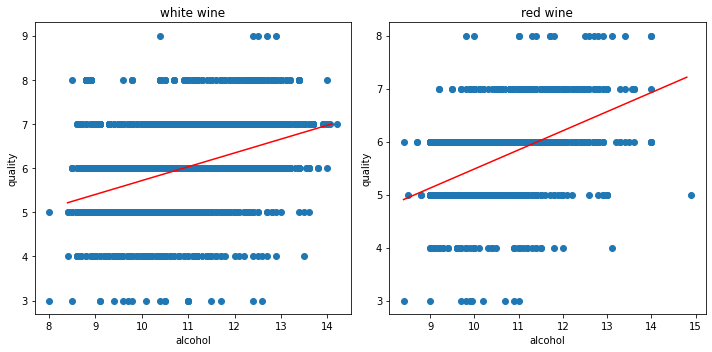

'\nWhy does density not yield any regression lines???\n'

In [17]:
feature_units = {'fixed acidity': 'g/dm3',
                        'volatile acidity': 'g/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g/dm3',
                        'alcohol': '%'
                        }
for feature in feature_units:
    create_2D_scatter_line(white_wine, red_wine, feature, 'quality')


"""
Why does density not yield any regression lines???
"""

In [18]:
# OK now let's write a function for detecting and removing outliers. 
# residual sugar seems to include outliers for both reds and whites. 

Q1 = np.percentile (white_wine['residual sugar'], 25)
Q3 = np.percentile (white_wine['residual sugar'], 75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print (upper)
print (lower)


upper_mask = white_wine['residual sugar'] >= upper
lower_mask = white_wine['residual sugar'] <= lower

print(white_wine[upper_mask]['residual sugar'].values)
print(white_wine[lower_mask]['residual sugar'].values)

print(np.where(upper_mask))

22.200000000000003
-10.600000000000001
[23.5  31.6  31.6  65.8  26.05 26.05 22.6 ]
[]
(array([1608, 1653, 1663, 2781, 3619, 3623, 4480]),)


In [19]:
"""
Function for detecting outliers. 

Two input parameters: dataframe, column label

Output: one tuple 
(int1, int2, list1, list2)

int1 = number of upper outliers
int2 = number of lower outliers
list1 = row numbers of upper outliers
list2 = row numbers of lower outliers
"""

def detect_outliers(df, column):
    Q1 = np.percentile (df[column], 25)
    Q3 = np.percentile (df[column], 75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR        # upper value threshold
    lower = Q1 - 1.5*IQR        # lower value threshold

    upper_mask = df[column] >= upper
    lower_mask = df[column] <= lower

    num_upper_outliers = len (df[upper_mask][column].values)
    num_lower_outliers = len (df[lower_mask][column].values)

    rows_upper_outliers = list (np.where(upper_mask)[0])      # indices for upper outliers as a list 
    rows_lower_outliers = list(np.where(lower_mask)[0])      # indices for lower outliers as a list

    return (num_upper_outliers, num_lower_outliers, rows_upper_outliers, rows_lower_outliers)



In [20]:
"""
Function for removing outliers from a df column

input params: df, column 
output: df with outlier rows dropped
"""

def drop_outliers (df, column):
    int1, int2, list1, list2 = detect_outliers(df, column)
    temp = df.copy()                            # important to call .copy() method, otherwise the original df also gets modified
    temp.drop(list1, inplace = True)
    temp.drop(list2, inplace = True)
    temp.Name = df.Name                         # Make sure to give the temp dataframe the same name; will need this later when plotting.
    return temp






In [74]:
"""
Great. 

Now let's call the function detect_outliers() for the dataframes white_wine and red_wine. 

Using a for loop, and the function's outputs, we'll create dataframes to show
how many upper and lower outliers there are for each feature. 
"""


features = ['fixed acidity','volatile acidity','citric acid',
            'residual sugar','chlorides','free sulfur dioxide',
            'total sulfur dioxide', 'density','pH','sulphates','alcohol']

# Initialise dicts
white_num_outliers = {}
red_num_outliers = {}

for feature in features:
    num_upper, num_lower, list_upper, list_lower = detect_outliers(white_wine, feature) # Only interested in num_upper and num_lower
    white_num_outliers[feature] = [num_upper, num_lower]                                # Save as values in dictionary

    num_upper, num_lower, list_upper, list_lower = detect_outliers(red_wine, feature)
    red_num_outliers[feature] = [num_upper, num_lower]

# Convert into dataframe
white_outliers = pd.DataFrame.from_dict(white_num_outliers, orient = 'index')
white_outliers.columns = ['upper_outliers', 'lower_outliers']
white_outliers['total_outliers'] = white_outliers['upper_outliers'] + white_outliers['lower_outliers']
white_outliers['total_pct'] = round ((white_outliers['total_outliers']/len(white_wine)) * 100, 2)


# Convert into dataframe
red_outliers = pd.DataFrame.from_dict(red_num_outliers, orient = 'index')
red_outliers.columns = ['upper_outliers', 'lower_outliers']
red_outliers['total_outliers'] = red_outliers['upper_outliers'] + red_outliers['lower_outliers']
red_outliers['total_pct'] = round ((red_outliers['total_outliers']/len(red_wine))*100, 2)




display (white_outliers)
display (red_outliers)




,upper_outliers,lower_outliers,total_outliers,total_pct
fixed acidity,123,23,146,2.98
volatile acidity,186,0,186,3.80
citric acid,185,85,270,5.51
residual sugar,7,0,7,0.14
chlorides,201,7,208,4.25
free sulfur dioxide,50,0,50,1.02
total sulfur dioxide,14,5,19,0.39
density,5,0,5,0.10
pH,66,9,75,1.53
sulphates,124,0,124,2.53


,upper_outliers,lower_outliers,total_outliers,total_pct
fixed acidity,49,0,49,3.06
volatile acidity,19,0,19,1.19
citric acid,1,0,1,0.06
residual sugar,155,0,155,9.69
chlorides,103,9,112,7.00
free sulfur dioxide,33,0,33,2.06
total sulfur dioxide,58,0,58,3.63
density,24,21,45,2.81
pH,21,14,35,2.19
sulphates,59,0,59,3.69


grad_1: -0.08891500636086437, grad_2: 0.060391712831431826, constant_1: 6.495820195467596, constant_2: 5.134789709197887


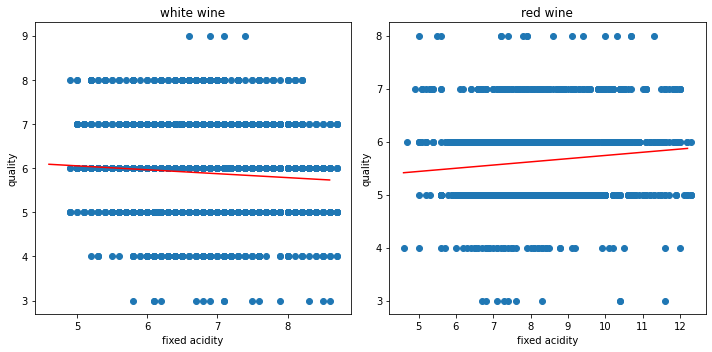

grad_1: -1.5884465577389355, grad_2: -1.7376932315721012, constant_1: 6.322891718103899, constant_2: 6.554562810529914


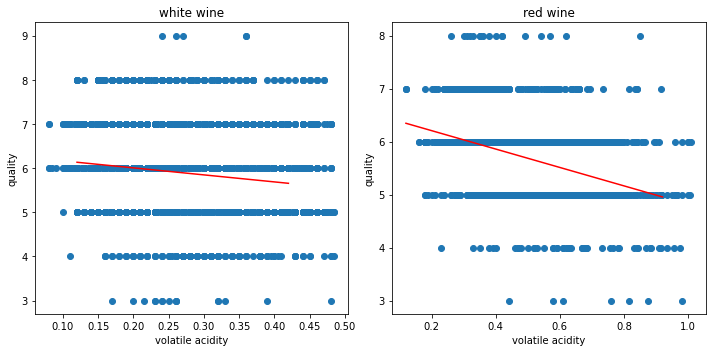

grad_1: 0.1769024149331096, grad_2: 0.96660996280643, constant_1: 5.846132970496463, constant_2: 5.375559561438289


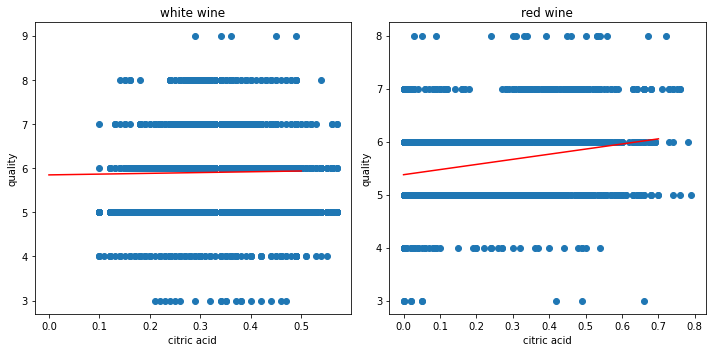

grad_1: -0.01781780825894227, grad_2: 0.06722929017954443, constant_1: 5.991359835244529, constant_2: 5.489876982896012


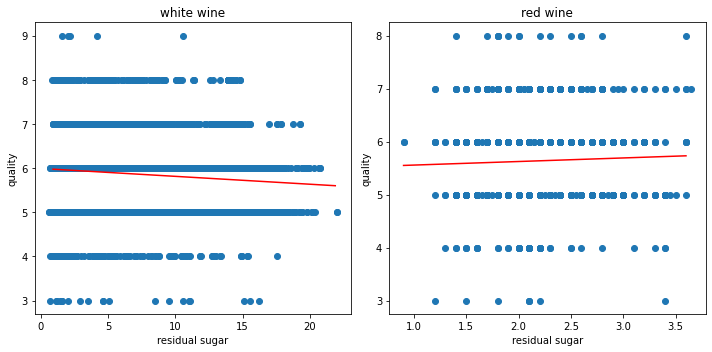

grad_1: -25.031101998630774, grad_2: -9.119168425408777, constant_1: 6.959398952409372, constant_2: 6.367145806522954


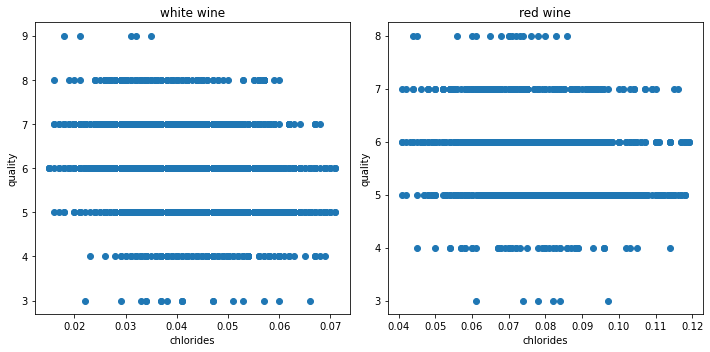

grad_1: 0.0019938271614461625, grad_2: -0.004693282889331802, constant_1: 5.811309703217429, constant_2: 5.707685503039629


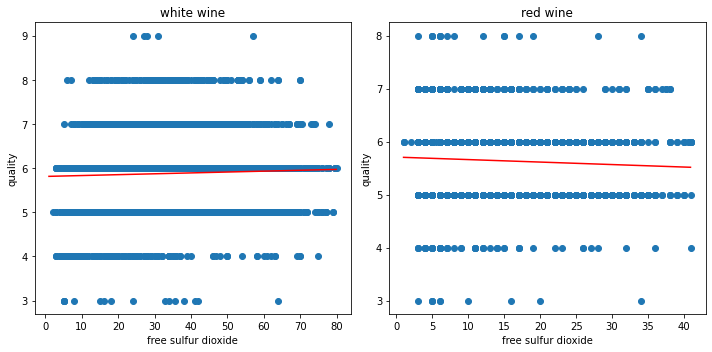

grad_1: -0.003543379456610323, grad_2: -0.0051345479366932565, constant_1: 6.3716092657011565, constant_2: 5.8734543308737


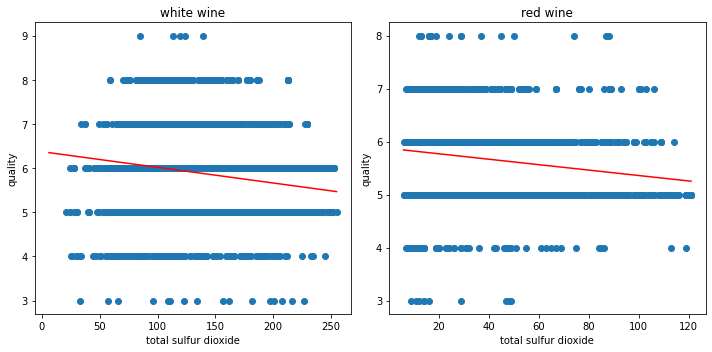

grad_1: -97.22629189374169, grad_2: -80.77023450376308, constant_1: 102.52148593210529, constant_2: 86.12875102616972


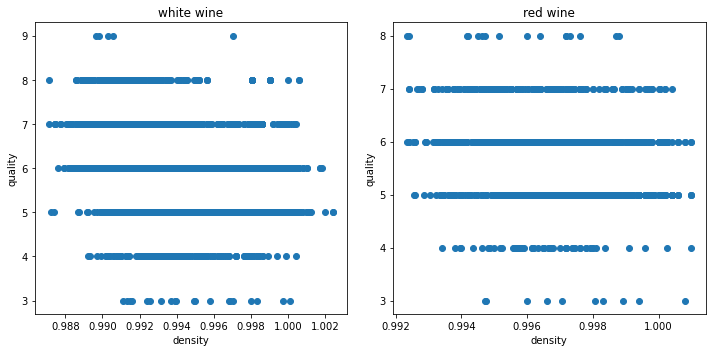

grad_1: 0.683999417479755, grad_2: -0.4409473177947092, constant_1: 3.7019857643847196, constant_2: 7.0919866328658685


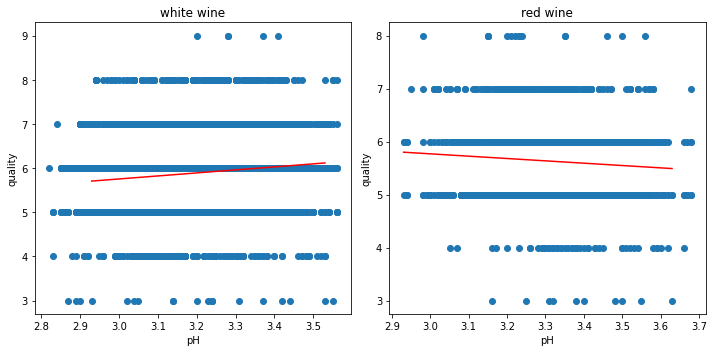

grad_1: 0.16005122687687173, grad_2: 2.6231353052502158, constant_1: 5.790679690299392, constant_2: 3.968258149370368


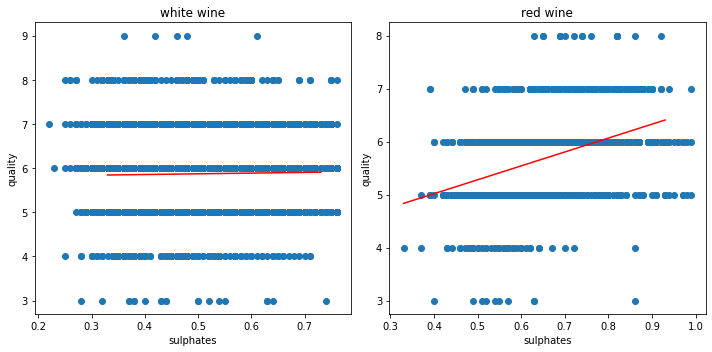

grad_1: 0.31346930191183553, grad_2: 0.37149962790783786, constant_1: 2.5820093991748836, constant_2: 1.7669806440142342


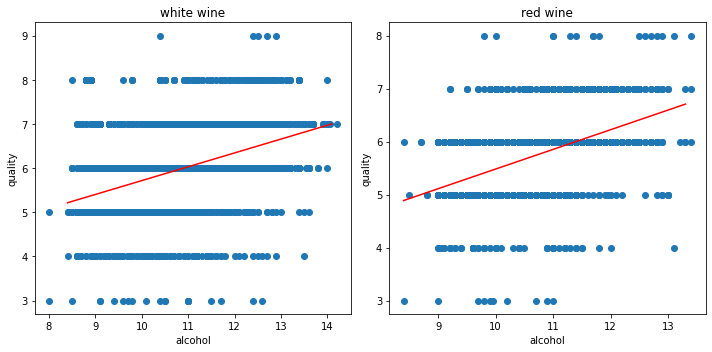

In [41]:
"""
Alright. Now let's use drop_outliers() to create scatter plots without the outliers.
"""
features = ['fixed acidity','volatile acidity','citric acid',
            'residual sugar','chlorides','free sulfur dioxide',
            'total sulfur dioxide', 'density','pH','sulphates','alcohol']

temp1 = []
temp2 = []

for i, feature in enumerate(features):

    temp1.append(drop_outliers(white_wine,feature))    # temp1 now stores the dataframe 'white_wine', but the rows containing outliers for 'feature' are dropped
    temp2.append(drop_outliers(red_wine,feature))
    create_2D_scatter_line(temp1[i], temp2[i], feature, 'quality')



In [23]:
"""
In some of the plots, you don't get a straight line.
This is likely because the features are incremented by too small a number.
Feature scaling would likely help.

"""

"\nIn some of the plots, you don't get a straight line.\nThis is likely because the features are incremented by too small a number.\nFeature scaling would likely help.\n\n"

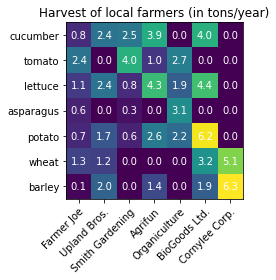

In [24]:
"""
Heatmap example from matplotlib documentation (as reference)
"""

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)


# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)



# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

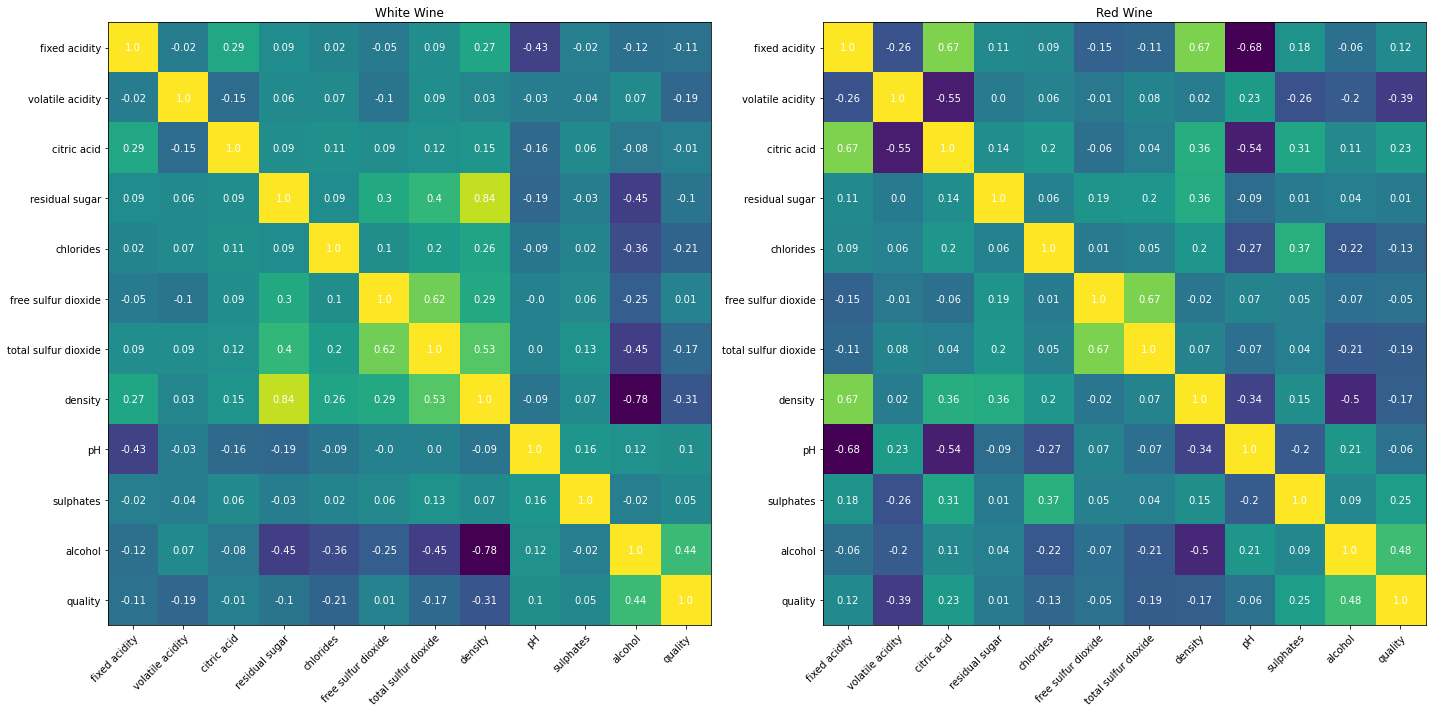

,quality
quality,1.000000
alcohol,0.435575
density,-0.307123
chlorides,-0.209934
volatile acidity,-0.194723
total sulfur dioxide,-0.174737
fixed acidity,-0.113663
pH,0.099427
residual sugar,-0.097577
sulphates,0.053678


,quality
quality,1.000000
alcohol,0.476166
volatile acidity,-0.390558
sulphates,0.251397
citric acid,0.226373
total sulfur dioxide,-0.185100
density,-0.174919
chlorides,-0.128907
fixed acidity,0.124052
pH,-0.057731


In [70]:
"""
Create heatmap of wine variables
"""

# Select only columns with numeric values
white_wine_nums = white_wine.select_dtypes(include = ['float64', 'int64'])
red_wine_nums = red_wine.select_dtypes(include = ['float64', 'int64'])

# Store column labels
features = white_wine_nums.columns

# Convert df into numpy array
white_wine_nums = white_wine_nums.corr().to_numpy()
red_wine_nums = red_wine_nums.corr().to_numpy()

# Create fig and axes
fig, ax = plt.subplots(1, 2, figsize = (20,10))

# Display data as image
im_white = ax[0].imshow(white_wine_nums)

# Want to show all xticks and yticks
ax[0].set_xticks(np.arange(len(white_wine_nums)))
ax[0].set_yticks(np.arange(len(white_wine_nums)))

# Add labels to xticks and yticks
ax[0].set_xticklabels(features)
ax[0].set_yticklabels(features)

# Rotate the tick labels and set their alignment.
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# Round correlation coefficient to two decimal figures
# and use absolute value for greater clarity.

for i in range(len(features)):
    for j in range(len(features)):
        text = ax[0].text(j, i, round(white_wine_nums[i, j],2),
                       ha="center", va="center", color="w")             

ax[0].set_title('White Wine')


im_red = ax[1].imshow(red_wine_nums)

ax[1].set_xticks(np.arange(len(red_wine_nums)))
ax[1].set_yticks(np.arange(len(red_wine_nums)))

# Add labels to xticks and yticks
ax[1].set_xticklabels(features)
ax[1].set_yticklabels(features)

# Rotate the tick labels and set their alignment.
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# Round correlation coefficient to two decimal figures
# and use absolute value for greater clarity.

for i in range(len(features)):
    for j in range(len(features)):
        text = ax[1].text(j, i, round(red_wine_nums[i, j],2),
                       ha="center", va="center", color="w")             

ax[1].set_title('Red Wine')



plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

white_wine_df = pd.DataFrame(white_wine_nums[-1,:])
white_wine_df.set_index(keys = features, inplace = True)
white_wine_df.columns = ['quality']
white_wine_df.sort_values('quality', key=abs, ascending = False, inplace = True)

red_wine_df = pd.DataFrame(red_wine_nums[-1,:])
red_wine_df.set_index(keys = features, inplace = True)
red_wine_df.columns = ['quality']
red_wine_df.sort_values('quality', key=abs, ascending = False, inplace = True)

display(white_wine_df)
display(red_wine_df)



In [26]:
"""

BELOW: WORK IN PROGRESS

"""

'\n\nBELOW: WORK IN PROGRESS\n\n'

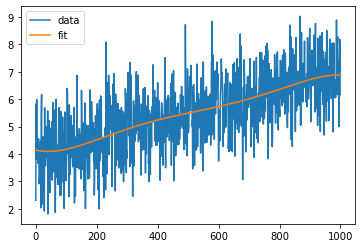

In [27]:
"""
How about polynomial fit?

Test the np.polyfit function first.
"""

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,1000)

# Define the graph we want to try fitting. 
# np.random.normal adds a random number to each x value (to create noise)
graph = 3*x + 4 + np.random.normal(size = len(x))

# Define the 5th order polynomial fit to the above graph.
poly = np.polyfit(x, graph, deg=5)

fig, ax = plt.subplots()
ax.plot(graph, label='data')
ax.plot(np.polyval(poly, x), label='fit')
ax.legend()
plt.show()

In [28]:
"""
OK now write a function that creates the same plots
as create_2D_scatter_line, but we will overlay
the scatter plots with a polynomial line (instead of straight line)

Three input parameters: 
feature1
feature2
p (= polynomial degree)
"""


def create_2D_scatter_polynomial(feature1, feature2, p):

    
    x_white = white_wine[feature1].tolist()
    y_white = white_wine[feature2].tolist()
    
    x_red = red_wine[feature1].tolist()
    y_red = red_wine[feature2].tolist()

    # Now we plot the scatter plots.

    fig, ax = plt.subplots(1, 2, figsize = (10,5))

    ax[0].scatter(white_wine[feature1], white_wine[feature2])
    ax[0].set_xlabel (feature1)
    ax[0].set_ylabel(feature2)
    ax[0].set_title('white wines')

    ax[1].scatter(red_wine[feature1], red_wine[feature2])
    ax[1].set_xlabel (feature1)
    ax[1].set_ylabel(feature2)
    ax[1].set_title('red wines')

    poly_white = np.polyfit(x_white, white_wine[feature2], deg = p)
    poly_red = np.polyfit(x_red, red_wine[feature2], deg = p)

    ax[0].plot(poly_white)
    ax[1].plot(poly_red)

    plt.tight_layout()
    plt.show()


    

    # Polynomial fit for white wines

    # max_x_white = white_wine[feature1].max()
    # min_x_white = white_wine[feature1].min()

    # x_range_white = np.arange(min_x_white, max_x_white, 0.1)

    #print(len(white_wine[feature2]))

    # poly_white = np.polyfit(x_range_white, white_wine[feature2], deg=p)


    # # Polynomial fit for red wines
    # max_x_red = red_wine[feature1].max()
    # min_x_red = red_wine[feature1].min()

    # x_range_red = np.arange(min_x_red, max_x_red, 0.1)
    # poly_red = np.polyfit(x_range_red, red_wine[feature2], deg=p)
    


    # ax[0].plot(x_range_white, poly_white)
    # ax[1].plot(x_range_red, poly_red)

    # plt.tight_layout()
    # plt.show()



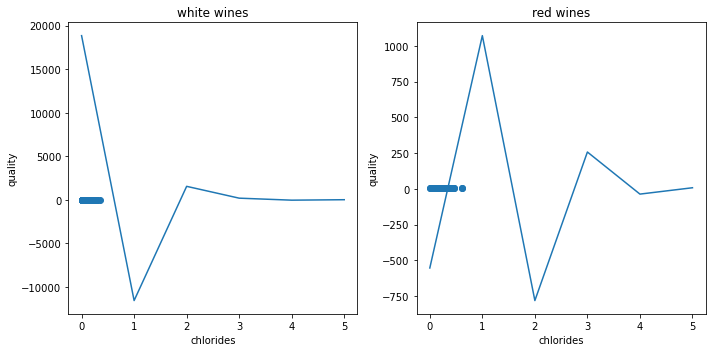

In [29]:
create_2D_scatter_polynomial('chlorides', 'quality', 5)

In [30]:
np.arange(1,4,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9])